In [606]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from numpy import unique
import matplotlib.pyplot as plt
import imblearn

In [709]:
data = pd.read_csv('training_data_raw.csv')
use_hot_encoding = True # False == LabelEncoding

/home/muhammadumar/anaconda3/envs/ml_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [710]:
def isnumber(x):
    try:
        float(x)
        return x
    except:
        return 0

In [711]:
d_columns = ['Agency', 'Policy Service Status', 'Admin System', 'Line of Business', 'Product Group', 'Product Name'
    , 'Product Type', 'Policy Age', 'Annualized Billed Premium', 'Face Amount', 'DI Benefit Amount'
    , 'Initial LTC Benefit Amount', 'Daily LTC Benefit Amount', 'Fund Balance', 'Insureds Customer Status'
    , 'Insureds Death Status', 'Insureds Age', 'Insureds Gender', 'Owners Customer Status', 'Owners Death Status'
    , 'Owners Age', 'Owners Gender', 'Owner\'s Income']
encode_columns = ['Agency', 'Policy Service Status', 'Policy Service Status', 'Admin System', 'Line of Business'
                  , 'Product Group','Product Type', 'Product Name', 'Issue Date', 'Insureds Customer Status'
                  , 'Insureds Death Status', 'Insureds Gender', 'Insureds City', 'Insureds State'
                  , 'Owners Customer Status', 'Owners Death Status', 'Owners Gender']

In [712]:
replace_dollar_sign = ['Annualized Billed Premium', 'Face Amount', 'DI Benefit Amount', 'Policy Age'
                       , 'Insured\'s Income', 'Owner\'s Income', 'Owners Age'
                       , 'Initial LTC Benefit Amount', 'Daily LTC Benefit Amount', 'Fund Balance']
# Replace $ and , from the columns mentioned above
for col in replace_dollar_sign:
    data[col].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
    data[col] = data[col].map(isnumber)
    data[col] = data[col].astype(float)

In [713]:
for i in data.columns:
    print(i)
    print("Unique = ", data[i].value_counts().count())
    print('Type = ', data[i].dtype)
    print("-------------------------")

Agency
Unique =  2
Type =  float64
-------------------------
Policy Number
Unique =  50609
Type =  object
-------------------------
Policy Service Status
Unique =  4
Type =  object
-------------------------
Admin System
Unique =  17
Type =  object
-------------------------
Line of Business
Unique =  5
Type =  object
-------------------------
Product Group
Unique =  13
Type =  object
-------------------------
Product Name
Unique =  33
Type =  object
-------------------------
Product Type
Unique =  173
Type =  object
-------------------------
Issue Date
Unique =  13898
Type =  object
-------------------------
Policy Age
Unique =  767
Type =  float64
-------------------------
Annualized Billed Premium
Unique =  7654
Type =  float64
-------------------------
Face Amount
Unique =  7797
Type =  float64
-------------------------
DI Benefit Amount
Unique =  1089
Type =  float64
-------------------------
Initial LTC Benefit Amount
Unique =  33
Type =  float64
-------------------------
Daily LTC

In [714]:
data = data[d_columns]
data = data.dropna()
data = data.reset_index(drop=True)

In [715]:
if not use_hot_encoding:
    le = preprocessing.LabelEncoder()
    for col in data.columns:
        if data[col].dtype == object:
            data[col] = le.fit_transform(data[col].values)
else:
    data['Product Name'] = le.fit_transform(data['Product Name'].values)
    data = pd.get_dummies(data)

In [716]:
for i in [20, 9]:
    data = data.drop(data[data['Product Name'] == i].index)
    
X = data.iloc[:,data.columns != 'Product Name']
y = data['Product Name']
X = preprocessing.scale(X)
# smote = imblearn.over_sampling.SMOTE()
# X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [717]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [718]:
y_pred = neigh.predict(X_test)

In [719]:
print(classification_report(y_test, y_pred, target_names = [str(integer) for integer in neigh.classes_]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00      1382
           3       1.00      0.94      0.97       120
           4       1.00      0.96      0.98       241
           5       1.00      0.86      0.92        14
           6       1.00      0.97      0.99       292
           7       1.00      1.00      1.00       126
           8       1.00      0.95      0.97       116
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00      2086
          12       1.00      0.99      1.00      2075
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        38
          15       1.00      0.92      0.96        49
          16       1.00      1.00      1.00        27
          17       1.00      0.44      0.62         9
          18       1.00    

In [720]:
accuracy_score(y_test, y_pred)

0.9915726609157266

27    12499
12     6281
11     6104
2      4034
22     2744
24     2639
25     2621
18     2005
26     1742
0      1216
6       942
4       704
7       384
3       373
8       358
29      179
15      174
30      123
14      122
1       106
21       67
16       66
28       36
5        35
13       31
23       31
10       24
17       18
19        6
Name: Product Name, dtype: int64

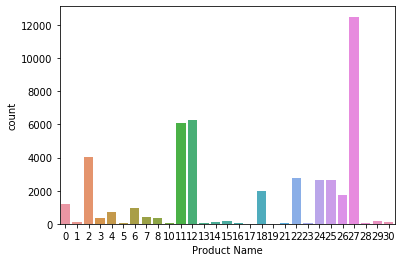

In [721]:
ax = sns.countplot(y,label="Product Name") 
data['Product Name'].value_counts()

In [722]:
unique(data['Product Name'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [727]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, cross_val_score
model = KNeighborsClassifier()
print(cross_val_score(model, X, y, cv=3))

[0.99389042 0.9946784  0.98823993]


In [624]:
data['Product Name'].dtype == object

False

In [729]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

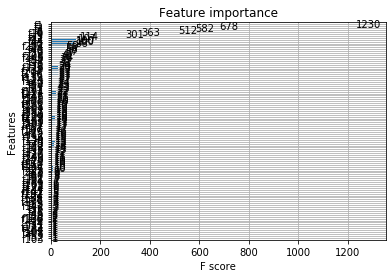

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00      1382
           3       0.99      0.99      0.99       120
           4       1.00      1.00      1.00       241
           5       1.00      0.93      0.96        14
           6       1.00      1.00      1.00       292
           7       1.00      1.00      1.00       126
           8       1.00      0.99      1.00       116
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00      2086
          12       1.00      1.00      1.00      2075
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        49
          16       1.00      1.00      1.00        27
          17       1.00      0.44      0.62         9
          18       1.00    

In [730]:
plot_importance(model)
plt.show()
y_pred = model.predict(X_test)
target_names = [str(integer) for integer in neigh.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

In [728]:
data

,Agency,Product Name,Policy Age,Annualized Billed Premium,Face Amount,DI Benefit Amount,Initial LTC Benefit Amount,Daily LTC Benefit Amount,Fund Balance,Insureds Age,...,Owners Customer Status_GA SERVICED,Owners Customer Status_PARTIAL ORPHAN,Owners Customer Status_TRUE ORPHAN,Owners Death Status_CLAIM PENDING,Owners Death Status_DEAD,Owners Death Status_INSURED,Owners Death Status_NOT INSURED,Owners Gender_F,Owners Gender_M,Owners Gender_Trust
0,50.0,6,5.5,0.0,0.0,0.0,0.0,0.0,0.0,46.9,...,0,0,0,0,0,1,0,1,0,0
1,50.0,6,5.5,0.0,0.0,0.0,0.0,0.0,0.0,56.6,...,0,0,0,0,0,1,0,1,0,0
2,50.0,6,5.5,0.0,0.0,0.0,0.0,0.0,0.0,54.9,...,0,0,0,0,0,1,0,1,0,0
3,50.0,6,5.4,0.0,0.0,0.0,0.0,0.0,0.0,40.9,...,0,0,0,0,0,1,0,1,0,0
4,50.0,6,5.5,0.0,0.0,0.0,0.0,0.0,0.0,64.5,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45661,120.0,29,2.1,147.0,25000.0,0.0,0.0,0.0,0.0,4.8,...,0,0,0,0,0,1,0,1,0,0
45662,120.0,29,2.1,1178.0,40000.0,0.0,0.0,0.0,0.0,53.4,...,0,0,0,0,0,1,0,0,1,0
45663,120.0,29,2.1,147.0,25000.0,0.0,0.0,0.0,0.0,2.6,...,0,0,0,0,0,1,0,1,0,0
45664,120.0,29,2.1,153.0,25000.0,0.0,0.0,0.0,0.0,7.1,...,0,0,0,0,0,1,0,1,0,0


In [694]:
data = preprocessing.scale(data)